In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math

## Regression Intro

### Creating Features

In [22]:
# Import Sales Data
sales_df = pd.read_csv('../data/advertising_and_sales_clean.csv')
#print(sales_df.head())

# Create X, an array of the values from the sales_df DataFrame's "radio" column.
X = sales_df.drop('sales', axis=1).values[:,1]
y = sales_df['sales'].values

#Reshape X into a two-dimensional NumPy array.
X = X.reshape(-1,1)

# Print the shape of X and y.
print(X.shape, y.shape)

(4546, 1) (4546,)


### Building a linear regression model

In [24]:
# Instantiate a linear regression model.
reg = LinearRegression()

# Predict sales values using X, storing as predictions

# Fit the model to the data
reg.fit(X,y)

# # Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


### Visualizing a linear regression model

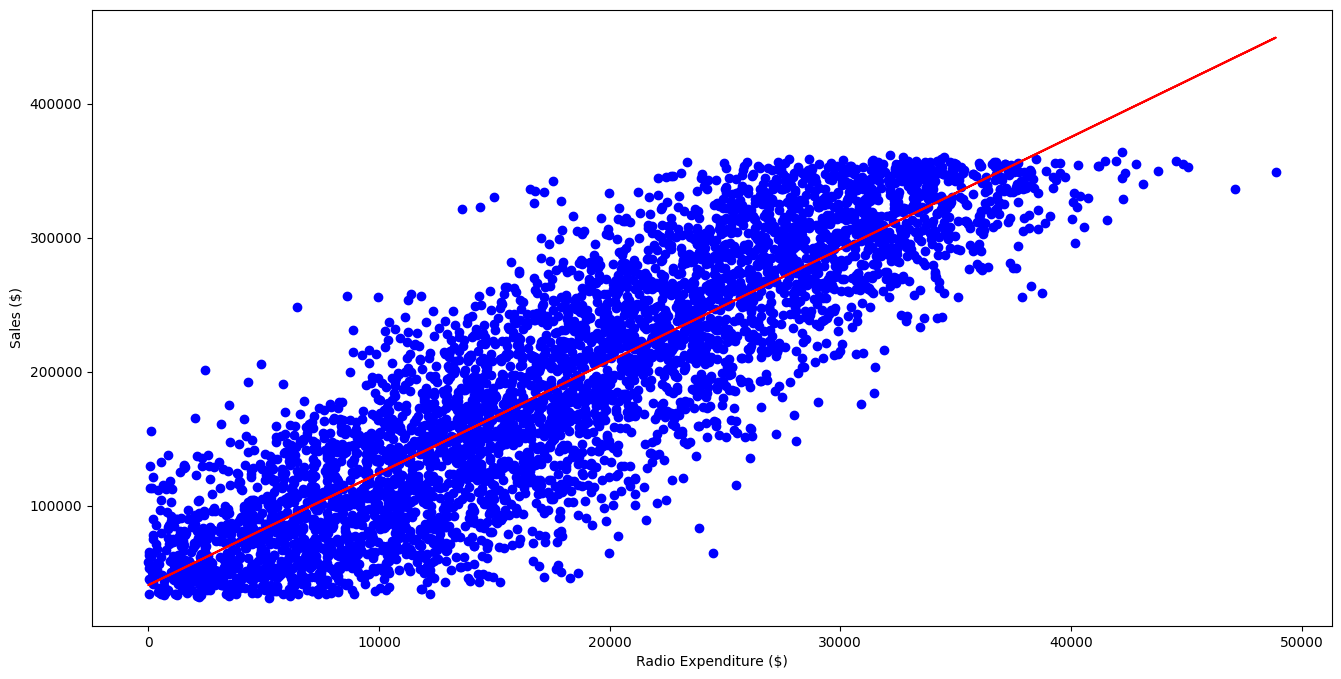

In [29]:
# Create a scatter plot visualizing y against X, with observations in blue.
fig, ax = plt.subplots( figsize=(16,8))
plt.scatter(X,y, color='blue')

# Draw a red line plot displaying the predictions against X.
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

plt.show()

## Basics of Linear Regression

### Fit and predict for regression

In [33]:
#print(sales_df.info)
# Create X, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
X = sales_df.drop(['sales','influencer'],axis=1).values
y = sales_df['sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate a linear regression model.
reg = LinearRegression()

# Fit the model to the training data.
reg.fit(X_train, y_train)

# Create y_pred, making predictions for sales using the test features.
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


### Regression performance

In [43]:
# Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
r_squared = reg.score(X_test, y_test)


# Calculate the model's root mean squared error using y_test and y_pred.
rmse = mean_squared_error(y_test, y_pred )
r2sm = r2_score(y_test, y_pred)

# Print r_squared r2 and rmse.

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(math.sqrt(rmse)))
print("RS: {}".format(r2sm))


R^2: 0.9990152104759368
RMSE: 2944.4331996001015
RS: 0.9990152104759368


## Cross Validation

### Cross-validation for R-squared

In [46]:
# Create X, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
X = sales_df.drop(['sales','influencer'],axis=1).values
y = sales_df['sales'].values

# Create kf by calling KFold(), setting the number of splits to six, shuffle to True, and setting a seed of 5
kf =KFold(n_splits=6, shuffle=True, random_state=5)

# Instantiate a linear regression model.
reg = LinearRegression()

# Perform cross-validation using reg on X and y, passing kf to cv.
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print the cv_scores.
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


### Analyzing cross-validation metrics

In [49]:
# Calculate and print the mean of the results.
print(np.mean(cv_scores))

# Calculate and print the standard deviation of cv_results.
print(np.std(cv_scores))

# Display the 95% confidence interval for your results using np.quantile().
print(np.quantile(cv_scores, [0.025,0.95]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99907922]


## Regularized Regression

### Regularized regression: Ridge

In [52]:
# Create X, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
X = sales_df.drop(['sales','influencer'],axis=1).values
y = sales_df['sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Store the alpha values in an array
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []

for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.999015210475987, 0.9990152104764387, 0.9990152104809561]


### Lasso regression for feature importance

[ 3.56256962 -0.00397035  0.00496385]


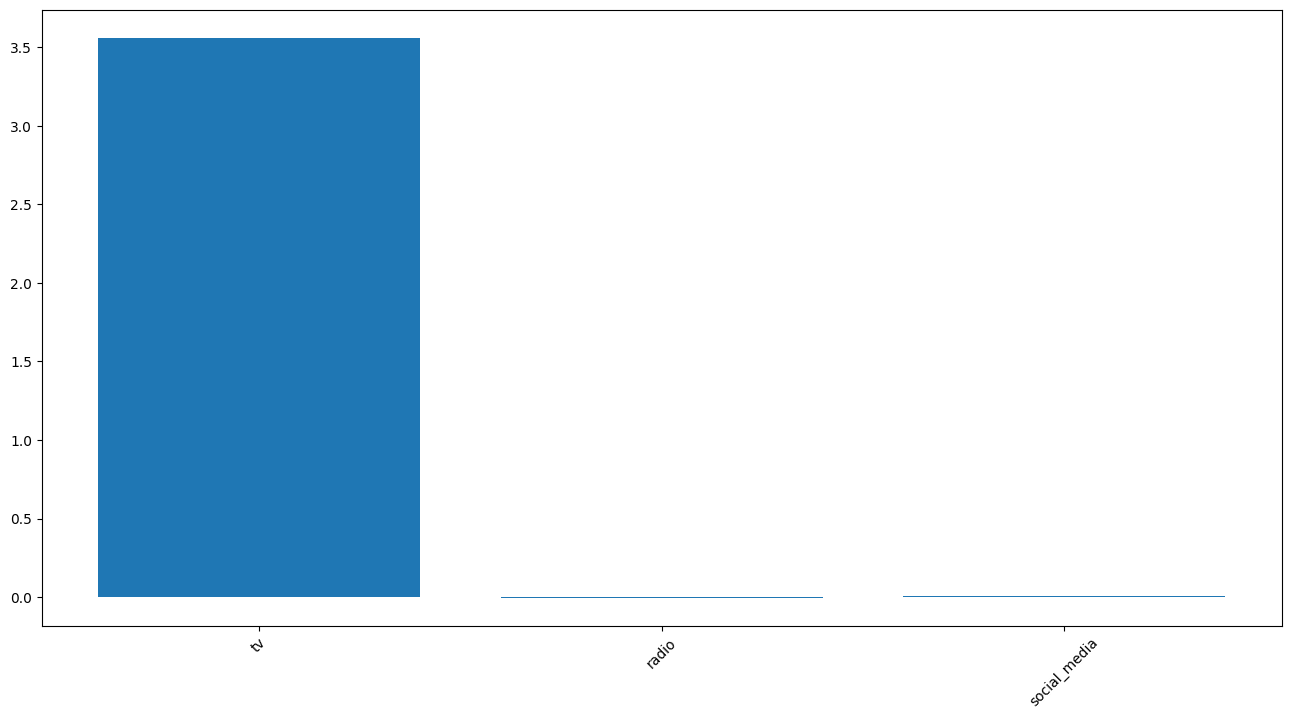

In [55]:
sales_columns = sales_df.drop(['sales','influencer'],axis=1).columns
# Instantiate a Lasso regressor with an alpha of 0.3.
lasso = Lasso(alpha=0.3)

#Fit the model to the data.
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
fig, ax = plt.subplots( figsize=(16,8)) 
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()
